In [1]:
import pandas as pd
import re
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

In [3]:
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [42]:
df=pd.read_excel('Jobs for lsiting.xlsx')
df.head()

,Job Title,body,Salary
0,Data Analyst,Communications Data AnalystLocation: Los Angel...,120000
1,Data Analyst,The ideal candidate for the Data Analyst/Finan...,120000
2,Data Analyst,Company OverviewKLA is a global leader in dive...,120000
3,Data Analyst,Gridiron IT is seeking a Data Analyst local to...,130000
4,Data Analyst,Business Intelligence AnalystLending Tech (rec...,135000


In [43]:
def preprocess_text(text):
  text=re.sub(r'<.*?>',' ',str(text))
  #remove numbers and special characters
  text=re.sub('[^A-Za-z0-9]+',' ',str(text))
  text=text.lower()
  return text

In [44]:
df['body']=df['body'].apply(preprocess_text)
df.head(10)

,Job Title,body,Salary
0,Data Analyst,communications data analystlocation los angele...,120000
1,Data Analyst,the ideal candidate for the data analyst finan...,120000
2,Data Analyst,company overviewkla is a global leader in dive...,120000
3,Data Analyst,gridiron it is seeking a data analyst local to...,130000
4,Data Analyst,business intelligence analystlending tech rece...,135000
5,Data Analyst,nan,135000
6,Data Analyst,data analyst job openingfully remote role out ...,155000
7,Data Analyst,overview minimum 5 years in a quantitative dat...,150000
8,Data Analyst,reporting to the director of operations the da...,55000
9,Data Analyst/Collector,must have 2 years of experience manipulating a...,70000


In [45]:
wpt=nltk.WordPunctTokenizer()
stop_words=nltk.corpus.stopwords.words("english")

In [46]:
df['body']=df['body'].apply(lambda x:' '.join([word for word in x.split()if word not in (stop_words)]))
df.head(10)

,Job Title,body,Salary
0,Data Analyst,communications data analystlocation los angele...,120000
1,Data Analyst,ideal candidate data analyst financial analyst...,120000
2,Data Analyst,company overviewkla global leader diversified ...,120000
3,Data Analyst,gridiron seeking data analyst local washington...,130000
4,Data Analyst,business intelligence analystlending tech rece...,135000
5,Data Analyst,nan,135000
6,Data Analyst,data analyst job openingfully remote role fort...,155000
7,Data Analyst,overview minimum 5 years quantitative data ana...,150000
8,Data Analyst,reporting director operations data analyst pro...,55000
9,Data Analyst/Collector,must 2 years experience manipulating analyzing...,70000


In [47]:
lemma=WordNetLemmatizer()
def text_preprocess(text):
  text=' '.join(lemma.lemmatize(word)for word in text.split(' '))
  return text


In [48]:

df['body']=df['body'].apply(text_preprocess)
df.head(10)

,Job Title,body,Salary
0,Data Analyst,communication data analystlocation los angeles...,120000
1,Data Analyst,ideal candidate data analyst financial analyst...,120000
2,Data Analyst,company overviewkla global leader diversified ...,120000
3,Data Analyst,gridiron seeking data analyst local washington...,130000
4,Data Analyst,business intelligence analystlending tech rece...,135000
5,Data Analyst,nan,135000
6,Data Analyst,data analyst job openingfully remote role fort...,155000
7,Data Analyst,overview minimum 5 year quantitative data anal...,150000
8,Data Analyst,reporting director operation data analyst prov...,55000
9,Data Analyst/Collector,must 2 year experience manipulating analyzing ...,70000


In [49]:

comment_words=''
stopwords=set(STOPWORDS)

In [50]:
for val in df.body:
  val=str(val)
  tokens=val.split()
  for i in range(len(tokens)):
    tokens[i]=tokens[i]
  comment_words+=" ".join(tokens)+" "

In [51]:

wordcloud=WordCloud(width=800,height=800,
                    background_color='pink',
                    min_font_size=10,max_words=100).generate(comment_words)


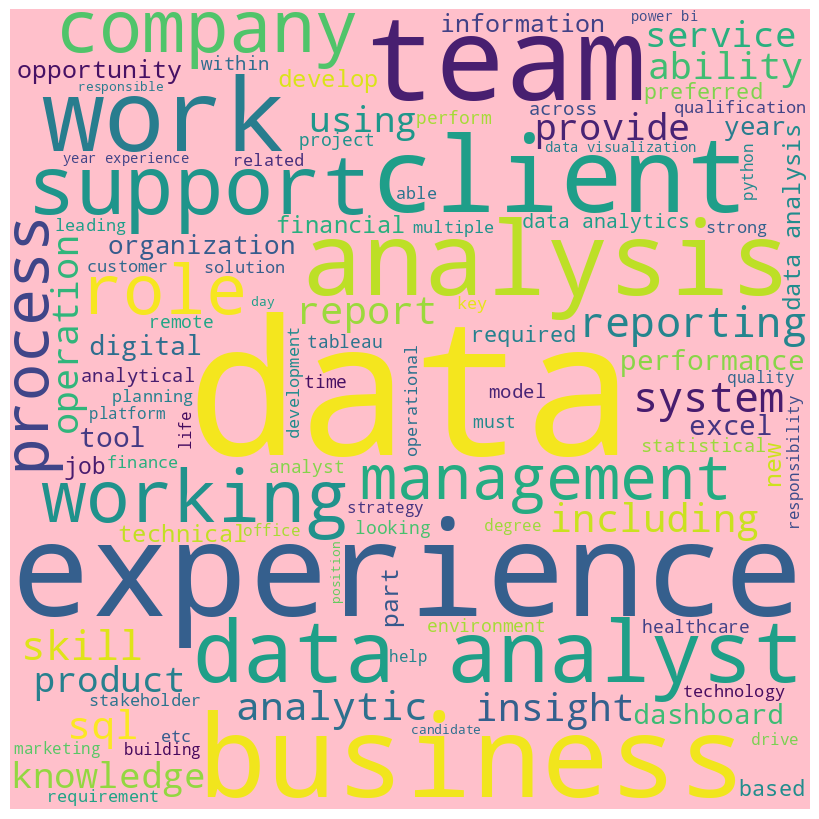

In [52]:

plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [53]:
df1=df['body']
df1.head()

0    communication data analystlocation los angeles...
1    ideal candidate data analyst financial analyst...
2    company overviewkla global leader diversified ...
3    gridiron seeking data analyst local washington...
4    business intelligence analystlending tech rece...
Name: body, dtype: object

In [54]:
tv=TfidfVectorizer(min_df=0.2,max_df=0.8,norm='l2',
                   use_idf=True,smooth_idf=True)
tv_matrix=tv.fit_transform(df1)
tv_matrix=tv_matrix.toarray()
vocab=tv.get_feature_names_out()
pd.DataFrame(np.round(tv_matrix,2),columns=vocab)

,100,ability,able,across,advanced,also,analysis,analytical,analytics,analyze,...,tool,understanding,using,vision,visualization,well,within,work,working,written
0,0.00,0.08,0.00,0.08,0.10,0.00,0.29,0.00,0.27,0.00,...,0.08,0.00,0.08,0.00,0.00,0.00,0.09,0.00,0.13,0.00
1,0.14,0.00,0.00,0.00,0.00,0.00,0.25,0.00,0.10,0.45,...,0.00,0.00,0.00,0.00,0.14,0.00,0.00,0.08,0.00,0.00
2,0.00,0.00,0.00,0.03,0.04,0.00,0.07,0.08,0.03,0.00,...,0.16,0.00,0.10,0.04,0.00,0.00,0.00,0.10,0.00,0.00
3,0.00,0.30,0.07,0.00,0.08,0.00,0.18,0.07,0.00,0.08,...,0.00,0.08,0.00,0.00,0.07,0.00,0.00,0.09,0.05,0.08
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.14,0.22,...,0.00,0.00,0.33,0.20,0.00,0.00,0.00,0.12,0.13,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00,0.14,0.00,0.00,0.00,0.26,0.00,0.10,0.00,...,0.00,0.00,0.35,0.00,0.28,0.00,0.00,0.08,0.00,0.00
7,0.00,0.00,0.00,0.09,0.35,0.00,0.26,0.00,0.31,0.00,...,0.00,0.23,0.09,0.00,0.00,0.11,0.00,0.19,0.14,0.00
8,0.00,0.05,0.19,0.05,0.00,0.07,0.08,0.00,0.00,0.07,...,0.00,0.07,0.05,0.00,0.00,0.14,0.06,0.04,0.04,0.07
9,0.00,0.07,0.09,0.07,0.00,0.10,0.00,0.00,0.00,0.00,...,0.00,0.00,0.07,0.00,0.00,0.00,0.34,0.00,0.24,0.00


In [73]:

comments=df['body'].to_list()
comments[:3]

['communication data analystlocation los angeles pittsburgh boston washington dc hybrid onsite 2 3 day per weekposition summary exciting opportunity seasoned communication data analyst help team gauge effectiveness outreach activity audience engagement including web social medium outlet research publishing activity medium relation congressional relation profile raising effort working within office external affair oea position play critical role developing tracking reporting key performance indicator kpis outreach dimension oea responsible using discretion independent judgement successful candidate responsible implementing advanced digital analytics analysis translating business goal solution lead measurable improvement uptake research among key audience doingdevelop kpis effectively track measure success departmental goal outreach campaign synthesizing input multiple source including manager researcher development team functional group memberslead development metric dashboard pull data

In [65]:
!pip install python-docx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 19.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184487 sha256=bdc3253cf3f7e44f6d34473d1c230d563687e133cb271049aea040a128c1912f
  Stored in directory: /root/.cache/pip/wheels/80/27/06/837436d4c3bd989b957a91679966f207bfd71d358d63a8194d
Successfully built python-docx


In [71]:
from docx import Document


In [74]:
doc = Document()

for comment in comments:
    doc.add_paragraph(comment)

doc.save('corpus.docx')

In [60]:
df['experience_year']=df['body'].str.extract('(\d+) year')
df

,Job Title,body,Salary,experience_year
0,Data Analyst,communication data analystlocation los angeles...,120000,6
1,Data Analyst,ideal candidate data analyst financial analyst...,120000,2
2,Data Analyst,company overviewkla global leader diversified ...,120000,5
3,Data Analyst,gridiron seeking data analyst local washington...,130000,NaN
4,Data Analyst,business intelligence analystlending tech rece...,135000,3
5,Data Analyst,nan,135000,NaN
6,Data Analyst,data analyst job openingfully remote role fort...,155000,5
7,Data Analyst,overview minimum 5 year quantitative data anal...,150000,5
8,Data Analyst,reporting director operation data analyst prov...,55000,NaN
9,Data Analyst/Collector,must 2 year experience manipulating analyzing ...,70000,2


In [61]:
df.to_csv('30JobListingExperienceYear.csv',index=False)